In [22]:
from pymongo import MongoClient
import folium
import pandas as pd
import matplotlib
import numpy as np
import pandas as pd
import os
import requests
import json
from pandas.io.json import json_normalize
import re
from SRC.formulas_calculo import*
from IPython.display import Image

## CLEANING DATA

> In these jupyter I will clean the companies.json data set with the aim to find the ideal country/ city to stablish a video game enterprise

In [2]:
dbName = "companies"
mongodbURL = f"mongodb://localhost/{dbName}"
client = MongoClient(mongodbURL, connectTimeoutMS=2000, serverSelectionTimeoutMS=2000)
db = client.get_database()

> Im gonna filter the data set to obtain only those firms that are in the gaming industry, plus those ones that were created after 2005 and that have raised more than $10M

In [3]:
cur = ({"$and":[{"total_money_raised":{"$regex":"(\$\d{2,}\M)"}}, 
               {"founded_year":{"$gte":2005}},
               {"category_code":{"$in":["games_video"]}}]})

video_game = list(db["companies"].find(cur,{"_id":0,"name":1, "category_code":1, "total_money_raised":1, "offices":1}))
video_game = pd.DataFrame(video_game)
video_game


,name,category_code,total_money_raised,offices
0,Joost,games_video,$45M,"[{'description': '', 'address1': '100 5th Ave ..."
1,AdaptiveBlue,games_video,$24M,"[{'description': '', 'address1': '131 Varick S..."
2,Funny Or Die,games_video,$18M,"[{'description': 'Head Quarters', 'address1': ..."
3,RockYou,games_video,$136M,"[{'description': '', 'address1': '585 Broadway..."
4,Curse,games_video,$12M,"[{'description': 'San Francisco', 'address1': ..."
5,Vuze,games_video,$34M,"[{'description': 'Headquarters', 'address1': '..."
6,Kongregate,games_video,$19M,"[{'description': '', 'address1': '2 Shaw Alley..."
7,hulu,games_video,$100M,"[{'description': None, 'address1': '12312 W. O..."
8,RayV,games_video,$16M,"[{'description': None, 'address1': '150 West 7..."
9,Zattoo,games_video,$10M,"[{'description': 'Zattoo USA', 'address1': '13..."


> Explode the offices column becasue it contains information of the firms such as: country code, latitude,longitude etc

In [4]:
gwershfdntfgjnerrdzchzberdfcvhn = video_game.explode("offices").apply(lambda e: e.offices,axis=1,result_type="expand")
expand_offices

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,,100 5th Ave Fl 6,,10011-6903,New York,NY,USA,40.746497,-74.009447
1,,131 Varick St,,10013,NYC,NY,USA,40.801358,-74.337200
2,Head Quarters,167 2nd Ave,,94401,San Mateo,CA,USA,37.421621,-122.137444
3,,585 Broadway,Suite A,94063,Redwood City,CA,USA,37.484619,-122.206893
4,San Francisco,60 Broadway,,94111,San Francisco,CA,USA,37.787092,-122.399972
4,Huntsville,150 West Park Loop NW,,35806,Huntsville,AL,USA,NaN,NaN
5,Headquarters,4 W. 4th Ave,,94402,San Mateo,CA,USA,37.485865,-122.226261
6,,2 Shaw Alley,4th Floor,94105,San Francisco,CA,USA,37.786942,-122.401245
7,None,12312 W. Olympic Blvd.,None,90064,Los Angeles,CA,USA,34.031276,-118.456806
8,None,"150 West 77, Suite 4",None,None,New York,NY,USA,40.781159,-73.978332


> Concat the two data set together

In [5]:
offices = pd.concat([video_game[["name","category_code","total_money_raised"]], expand_offices], axis=1)
offices

,name,category_code,total_money_raised,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,Joost,games_video,$45M,,100 5th Ave Fl 6,,10011-6903,New York,NY,USA,40.746497,-74.009447
1,AdaptiveBlue,games_video,$24M,,131 Varick St,,10013,NYC,NY,USA,40.801358,-74.337200
2,Funny Or Die,games_video,$18M,Head Quarters,167 2nd Ave,,94401,San Mateo,CA,USA,37.421621,-122.137444
3,RockYou,games_video,$136M,,585 Broadway,Suite A,94063,Redwood City,CA,USA,37.484619,-122.206893
4,Curse,games_video,$12M,San Francisco,60 Broadway,,94111,San Francisco,CA,USA,37.787092,-122.399972
4,Curse,games_video,$12M,Huntsville,150 West Park Loop NW,,35806,Huntsville,AL,USA,NaN,NaN
5,Vuze,games_video,$34M,Headquarters,4 W. 4th Ave,,94402,San Mateo,CA,USA,37.485865,-122.226261
6,Kongregate,games_video,$19M,,2 Shaw Alley,4th Floor,94105,San Francisco,CA,USA,37.786942,-122.401245
7,hulu,games_video,$100M,None,12312 W. Olympic Blvd.,None,90064,Los Angeles,CA,USA,34.031276,-118.456806
8,RayV,games_video,$16M,None,"150 West 77, Suite 4",None,None,New York,NY,USA,40.781159,-73.978332


> In the next part I will create some plot bars to find out with city is the one I wanna base my company in.

>Im only gonna stay with the US based companies due to its high activity in the video game sector. 

>In the USA, California seems to be the state with more video-game indsutry
San Francisco is the city with the highest amount video-game related enterprises 

Text(0.5, 1.0, 'COUNTRY')

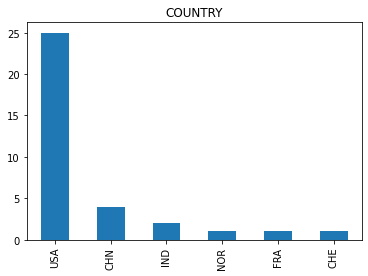

In [6]:

offices["country_code"].value_counts().nlargest(6).plot.bar().set_title("COUNTRY")

In [7]:
offices = offices[(offices["country_code"]=="USA")]



Text(0.5, 1.0, 'STATE_CODE')

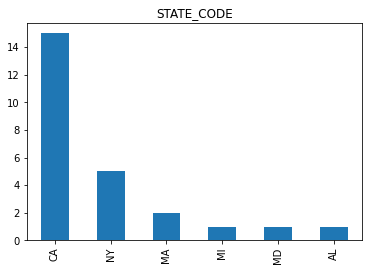

In [8]:
offices["state_code"].value_counts().nlargest(10).plot.bar().set_title("STATE_CODE")

In [9]:
offices = offices[(offices["state_code"]=="CA")]

Text(0.5, 1.0, 'CITY')

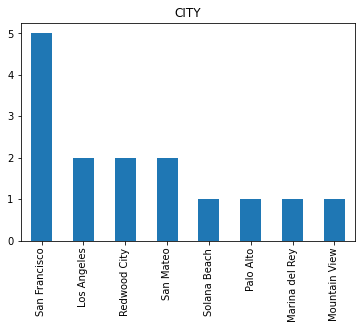

In [10]:
offices["city"].value_counts().nlargest(10).plot.bar().set_title("CITY")

In [11]:
offices = offices[(offices["city"]=="San Francisco")]



> Dropping unnecesary columns plus transforming the latitude and longitude column to geopoint. In order to work with mongo later on

In [12]:
offices = offices.drop(columns = ["description", "address2","zip_code"])

In [18]:
"""
def transformToGeoPoint(s):
    if np.isnan(s.latitude) or np.isnan(s.longitude):
        return None
    return {
        "type":"Point",
        "coordinates":[s.longitude, s.latitude]
    }
    
"""
offices["geopoint"] = offices.apply(transformToGeoPoint, axis=1)


In [19]:
offices

,name,category_code,total_money_raised,address1,city,state_code,country_code,latitude,longitude,geopoint
4,Curse,games_video,$12M,60 Broadway,San Francisco,CA,USA,37.787092,-122.399972,"{'type': 'Point', 'coordinates': [-122.399972,..."
6,Kongregate,games_video,$19M,2 Shaw Alley,San Francisco,CA,USA,37.786942,-122.401245,"{'type': 'Point', 'coordinates': [-122.401245,..."
10,Zynga,games_video,$860M,365 Vermont St.,San Francisco,CA,USA,37.765158,-122.404234,"{'type': 'Point', 'coordinates': [-122.404234,..."
13,Kabam,games_video,$125M,795 Folsom Street,San Francisco,CA,USA,37.394456,-122.078531,"{'type': 'Point', 'coordinates': [-122.0785314..."
21,KIXEYE,games_video,$19M,333 Bush Street,San Francisco,CA,USA,NaN,NaN,None


> Import the new dataframe to json format

In [16]:
offices.to_json("OUTPUT/chosen_offices.json",orient="records")